In [2]:
import numpy as np

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
from matplotlib import rc
import matplotlib.colors as mplcolors
from mpltools import annotation

rc('lines', linewidth=1.5, markeredgecolor='k', markeredgewidth=1)
rc('xtick', direction='in', labelsize=9)
rc('ytick', direction='in', labelsize=9)

rc('font', family='serif', size=9)
rc('text', usetex=True)

rc('figure', dpi=300)
rc('savefig', dpi=300)

In [4]:
# EHD Functions

def F1_z(z, vz, E=10e3, eta=0.001, a=1.5e-6, rho=1050, kT=4e-21):
    return - 6 * np.pi * eta * a**2 / z * vz

def F2_z(z, vx, E=10e3, eta=0.001, a=1.5e-6, rho=1050, kT=4e-21):
    return 0.416 * (eta**2 * vx**2) / (E / 3) * (a / z)**(5/2)

def F3_z(z, vz, E=10e3, eta=0.001, a=1.5e-6, rho=1050, kT=4e-21):
    return - 41.912 * (eta**2 * vz ** 2) / (E / 3) * (a / z)**(7/2)

def F4_z(z, az, E=10e3, eta=0.001, a=1.5e-6, rho=1050):
    return 18.499 * (eta**2 * az * a) / (E / 3) * (a / z)**(5/2)

In [6]:
z = np.linspace(50e-9, 5e-6, 100)

In [7]:
# Dummy OM: velocity considered constant 

vz = 30e-6
vx = 0.

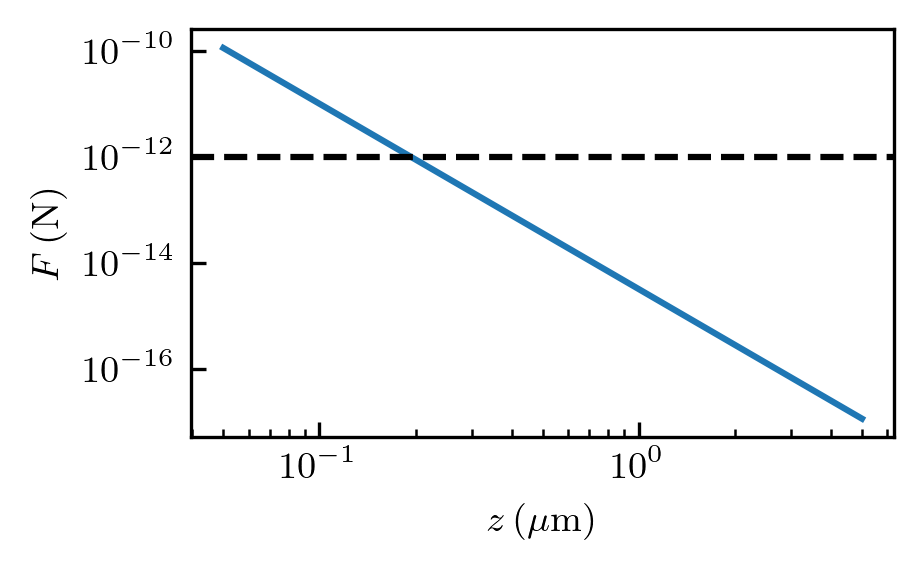

In [15]:
fix, ax = plt.subplots(1, 1, figsize=(8/2.54, 5/2.54))
ax.loglog(z*1e6, - F3_z(z, vz, a=5e-6))
ax.axhline(y=1e-12, ls='--', c='k')
ax.set(xlabel=r'$z \, \mathrm{(\mu m)}$', ylabel=r'$F \, \mathrm{(N)}$')
plt.tight_layout()
plt.show()

In [ ]:
# Less dummy OM: linear decrease of v 

In [126]:
z0 = 25e-6 
zmax = 50e-9
v0 = - 30e-6

a = 5e-6

Eeff = gamma / a

alpha = - v0 / z0

z = np.linspace(z0, zmax, 100)
v = v0 - alpha * (z - z0)

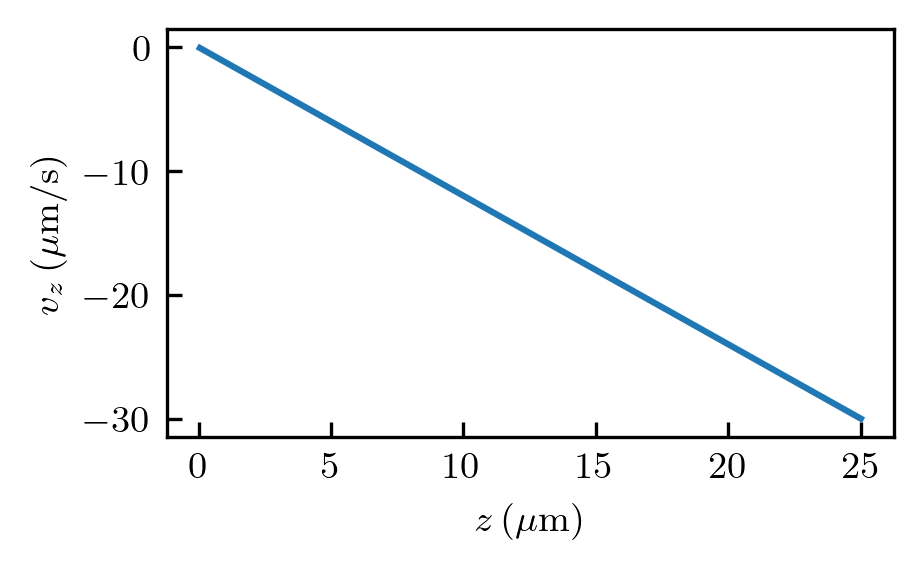

In [127]:
fix, ax = plt.subplots(1, 1, figsize=(8/2.54, 5/2.54))
ax.plot(z*1e6, v * 1e6)
ax.set(xlabel=r'$z \, \mathrm{(\mu m)}$', ylabel=r'$v_z \, \mathrm{(\mu m / s)}$')
plt.tight_layout()
plt.show()

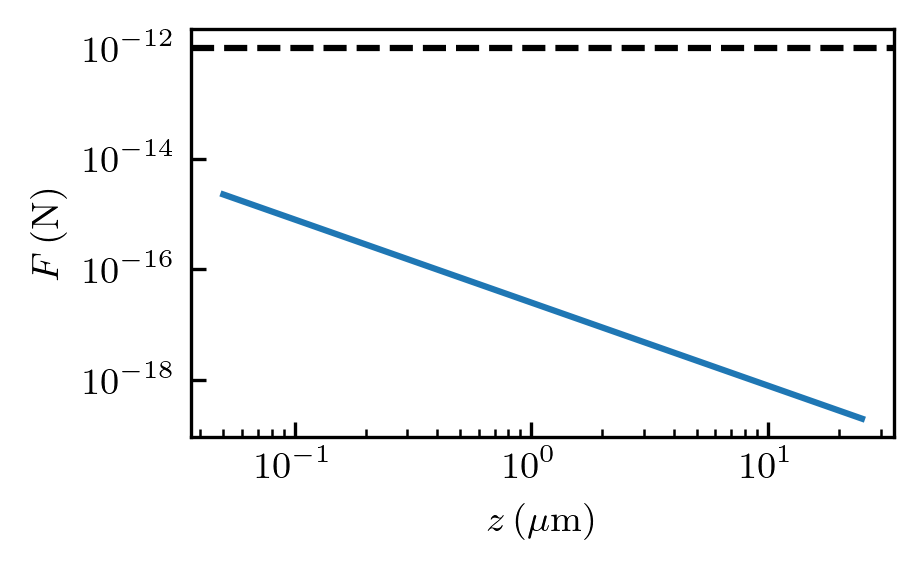

In [128]:
fix, ax = plt.subplots(1, 1, figsize=(8/2.54, 5/2.54))
ax.loglog(z*1e6, - F3_z(z, vz=v, a=a, E=Eeff))
ax.axhline(y=1e-12, ls='--', c='k')
ax.set(xlabel=r'$z \, \mathrm{(\mu m)}$', ylabel=r'$F \, \mathrm{(N)}$')
plt.tight_layout()
plt.show()

In [122]:
# Less dummy OM: solve Newton

z0 = - 25e-6 
zmax = 0
v0 = 30e-6

eta_m = 0.001
a = 5e-6
drho = 70
gamma = 10e-3

m = 4/3 * np.pi * a**3 * drho
Eeff = gamma / a

tau = m / (6*np.pi*eta_m*a)

F = 10e-12

c1 = F / (6*np.pi*eta_m*a)

t = np.linspace(0, h/v0, int(1e5))

v = c1 + (v0 - c1) * np.exp(-t/tau) 
z = z0 + v * t

v[z>zmax] = np.nan
z[z>zmax] = np.nan
v = v[~np.isnan(v)]
z = z[~np.isnan(z)]

In [82]:
len(z)

100000

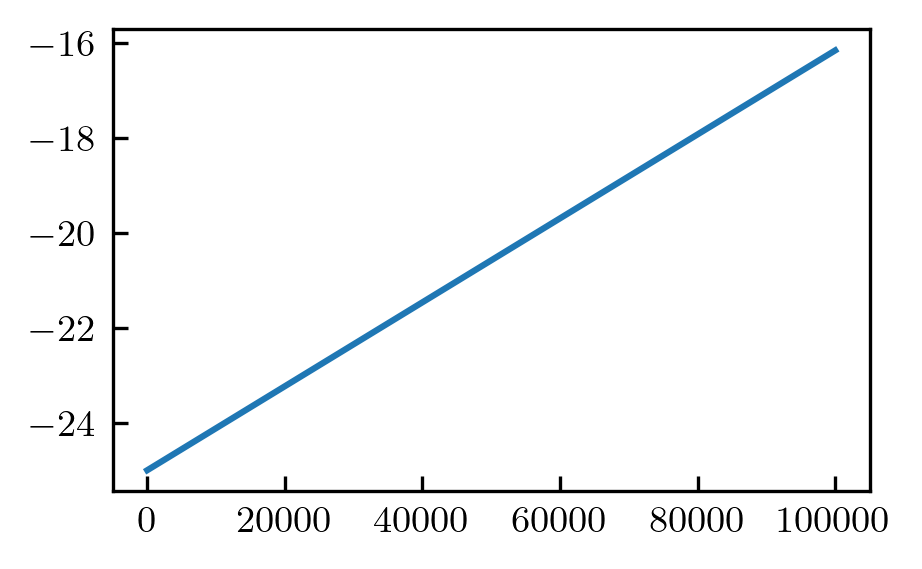

In [84]:
fix, ax = plt.subplots(1, 1, figsize=(8/2.54, 5/2.54))
ax.plot(z*1e6)
# ax.set(xlabel=r'$z \, \mathrm{(\mu m)}$', ylabel=r'$v_z \, \mathrm{(\mu m / s)}$')
plt.tight_layout()
plt.show()

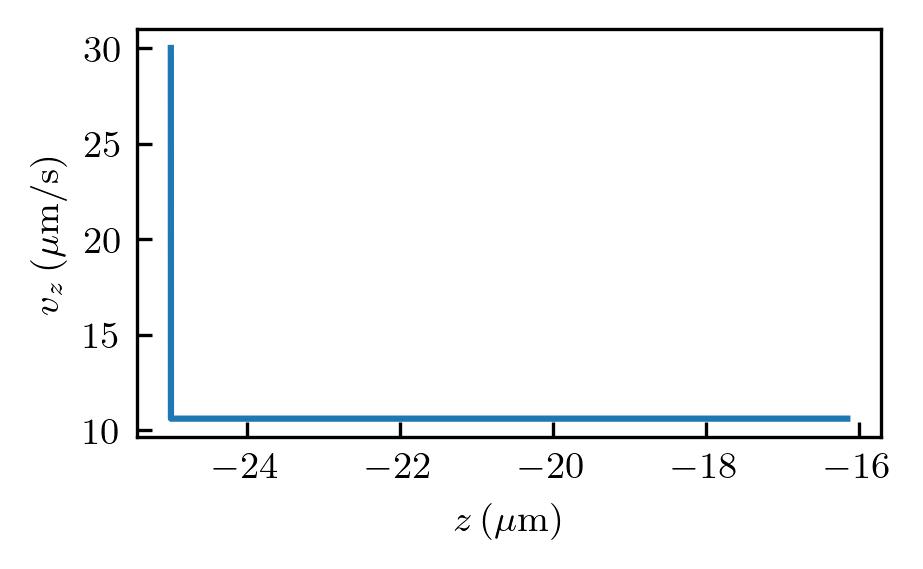

In [85]:
fix, ax = plt.subplots(1, 1, figsize=(8/2.54, 5/2.54))
ax.plot(z*1e6, v * 1e6)
ax.set(xlabel=r'$z \, \mathrm{(\mu m)}$', ylabel=r'$v_z \, \mathrm{(\mu m / s)}$')
plt.tight_layout()
plt.show()

/tmp/ipykernel_699416/559077809.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.axhline(y=1e-12, ls='--', c='k')


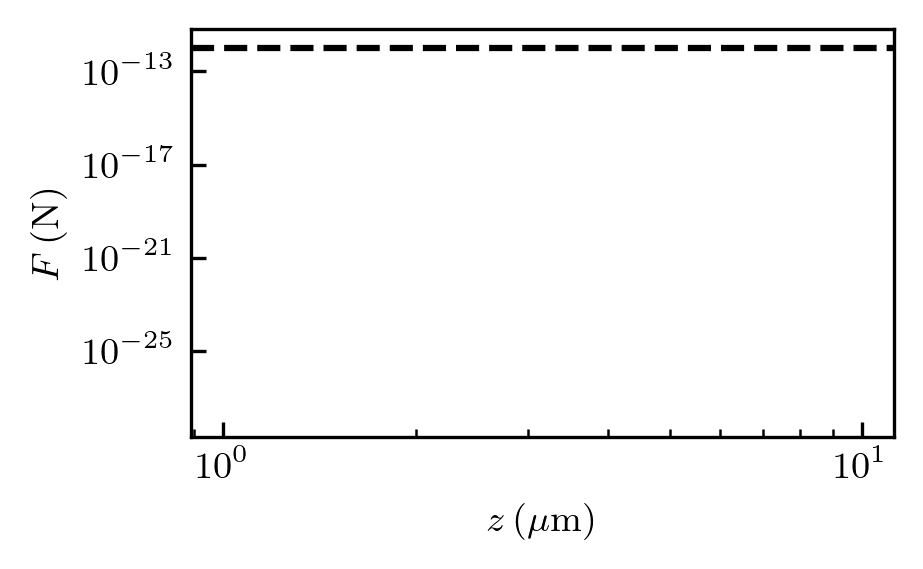

In [31]:
fix, ax = plt.subplots(1, 1, figsize=(8/2.54, 5/2.54))
ax.loglog(z*1e6, - F3_z(z, vz=v, a=a, E=Eeff))
ax.axhline(y=1e-12, ls='--', c='k')
ax.set(xlabel=r'$z \, \mathrm{(\mu m)}$', ylabel=r'$F \, \mathrm{(N)}$')
plt.tight_layout()
plt.show()